<a href="https://colab.research.google.com/github/Youssef8323/Code-Cosmetics/blob/main/PerformanceEvaluationTutorialSolution_Classification_and_Regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pycaret
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
# import libraries
import pandas as pd
import numpy as np# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# check data dimensions
data.shape


(7043, 21)

In [ ]:
# check data types
data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
# convert to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')


In [ ]:
import plotly.express as px
fig = px.scatter(x=data['tenure'], y=data['TotalCharges'],
                 color = data['Churn'], template = 'presentation',
                 opacity = 0.5, facet_col = data['Contract'],
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
fig.show()


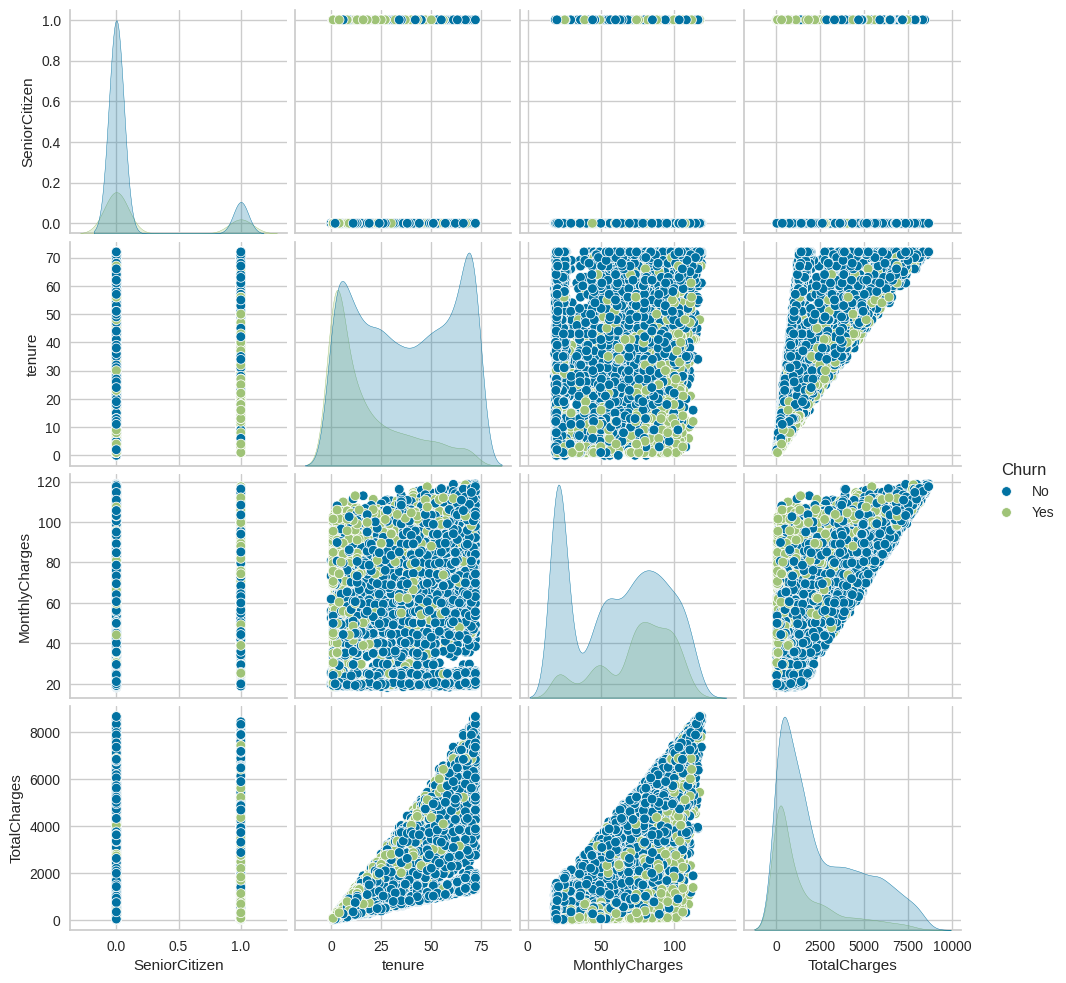

In [ ]:
from matplotlib import colors
#To see a pair plot of all combinations of variables
# importing packages
import seaborn
import matplotlib.pyplot as plt
# pairplot with hue Chrun
seaborn.pairplot(data, hue ='Churn')
# to show
plt.show()


In [ ]:
# check missing values
data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# To find out the percentage of missing data in TotalCharges
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df


,percent_missing
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [ ]:
# init setup
from pycaret.classification import *
s = setup(data, target = 'Churn', ignore_features = ['customerID'])


,Description,Value
0,Session id,8876
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Numeric features,4


In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8085,0.8483,0.8085,0.8014,0.8035,0.4852,0.4879,1.7120
gbc,Gradient Boosting Classifier,0.8067,0.8469,0.8067,0.7981,0.7997,0.4722,0.4770,1.5990
ada,Ada Boost Classifier,0.8057,0.8443,0.8057,0.7963,0.7979,0.4661,0.4718,0.5850
ridge,Ridge Classifier,0.8041,0.8393,0.8041,0.7946,0.7962,0.4615,0.4672,0.3310
lda,Linear Discriminant Analysis,0.8002,0.8393,0.8002,0.7934,0.7957,0.4660,0.4681,0.5670
lightgbm,Light Gradient Boosting Machine,0.7982,0.8359,0.7982,0.7907,0.7929,0.4574,0.4602,0.7260
xgboost,Extreme Gradient Boosting,0.7913,0.8270,0.7913,0.7830,0.7853,0.4369,0.4401,0.7480
rf,Random Forest Classifier,0.7943,0.8269,0.7943,0.7831,0.7850,0.4305,0.4371,1.0890
nb,Naive Bayes,0.6895,0.8224,0.6895,0.7989,0.7075,0.3786,0.4281,0.6730
qda,Quadratic Discriminant Analysis,0.6929,0.8214,0.6929,0.7916,0.7099,0.3748,0.4172,0.3250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# print best_model parameters
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8876, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# tune the best model
tuned_best_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8114,0.8624,0.8114,0.8048,0.8069,0.4929,0.4951
1,0.8154,0.8372,0.8154,0.8103,0.8122,0.5089,0.5102
2,0.8134,0.8587,0.8134,0.8073,0.8093,0.5024,0.5043
3,0.8114,0.8669,0.8114,0.8028,0.8046,0.4852,0.4900
4,0.7870,0.8212,0.7870,0.7809,0.7833,0.4364,0.4374
5,0.8032,0.8440,0.8032,0.7957,0.7981,0.4713,0.4739
6,0.8195,0.8681,0.8195,0.8134,0.8153,0.5174,0.5196
7,0.8032,0.8265,0.8032,0.7951,0.7974,0.4686,0.4717
8,0.8073,0.8525,0.8073,0.7984,0.8004,0.4742,0.4788


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


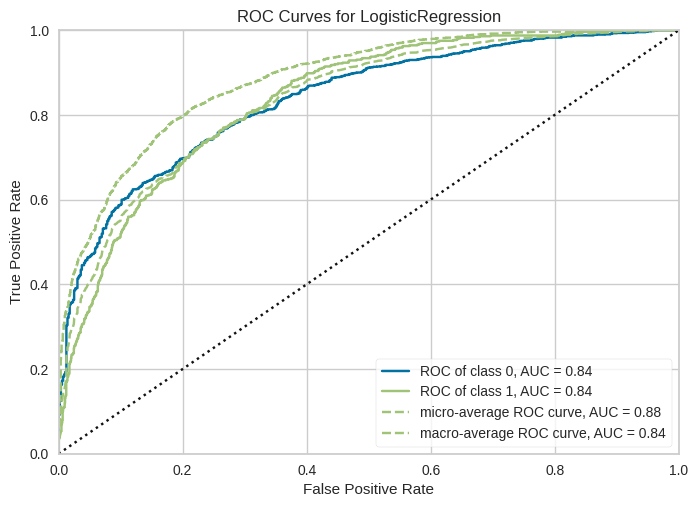

In [ ]:
# Analyse the AUC Plot
plot_model(tuned_best_model, plot = 'auc')

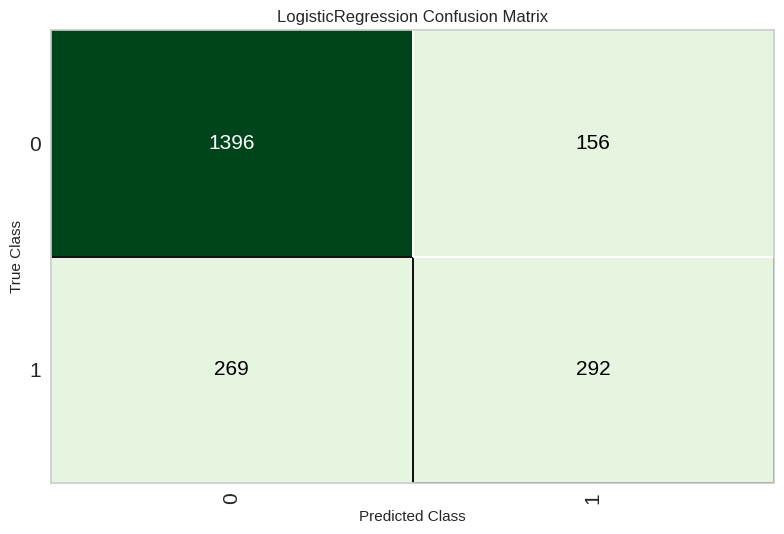

In [ ]:
# Analyse the Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')


In [ ]:
# comparing all models
best_model = compare_models(sort='Recall')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8085,0.8483,0.8085,0.8014,0.8035,0.4852,0.4879,1.1250
gbc,Gradient Boosting Classifier,0.8067,0.8469,0.8067,0.7981,0.7997,0.4722,0.4770,1.2010
ada,Ada Boost Classifier,0.8057,0.8443,0.8057,0.7963,0.7979,0.4661,0.4718,0.6970
ridge,Ridge Classifier,0.8041,0.8393,0.8041,0.7946,0.7962,0.4615,0.4672,0.3200
lda,Linear Discriminant Analysis,0.8002,0.8393,0.8002,0.7934,0.7957,0.4660,0.4681,0.5450
lightgbm,Light Gradient Boosting Machine,0.7982,0.8359,0.7982,0.7907,0.7929,0.4574,0.4602,0.9190
rf,Random Forest Classifier,0.7943,0.8269,0.7943,0.7831,0.7850,0.4305,0.4371,1.1340
xgboost,Extreme Gradient Boosting,0.7913,0.8270,0.7913,0.7830,0.7853,0.4369,0.4401,0.7350
et,Extra Trees Classifier,0.7809,0.7995,0.7809,0.7698,0.7727,0.4006,0.4050,0.8570
svm,SVM - Linear Kernel,0.7738,0.7652,0.7738,0.7690,0.7608,0.3722,0.3881,0.4370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# print best_model parameters
print(best_model)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8876, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


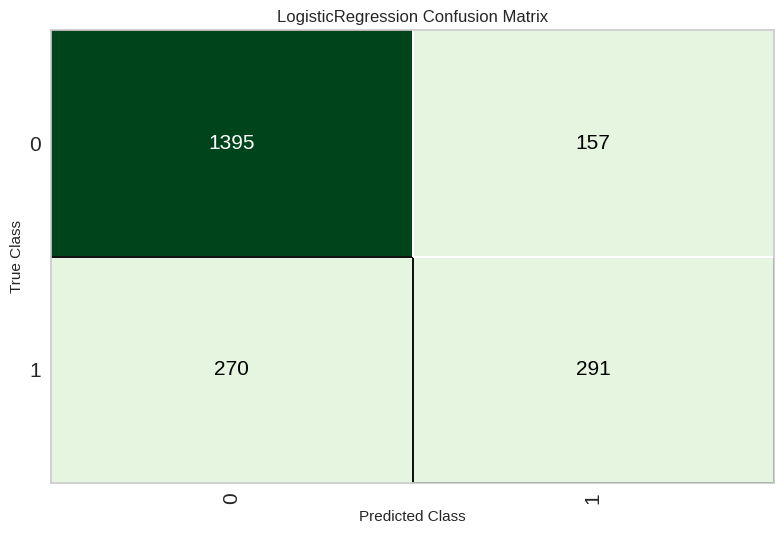

In [ ]:
# Analyse the Confusion Matrix of the best model
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
# Lets see if tuning the best model (Gaussian NB) improves
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8114,0.8624,0.8114,0.8048,0.8069,0.4929,0.4951
1,0.8154,0.8372,0.8154,0.8103,0.8122,0.5089,0.5102
2,0.8134,0.8587,0.8134,0.8073,0.8093,0.5024,0.5043
3,0.8114,0.8669,0.8114,0.8028,0.8046,0.4852,0.4900
4,0.7870,0.8212,0.7870,0.7809,0.7833,0.4364,0.4374
5,0.8032,0.8440,0.8032,0.7957,0.7981,0.4713,0.4739
6,0.8195,0.8681,0.8195,0.8134,0.8153,0.5174,0.5196
7,0.8032,0.8265,0.8032,0.7951,0.7974,0.4686,0.4717
8,0.8073,0.8525,0.8073,0.7984,0.8004,0.4742,0.4788


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


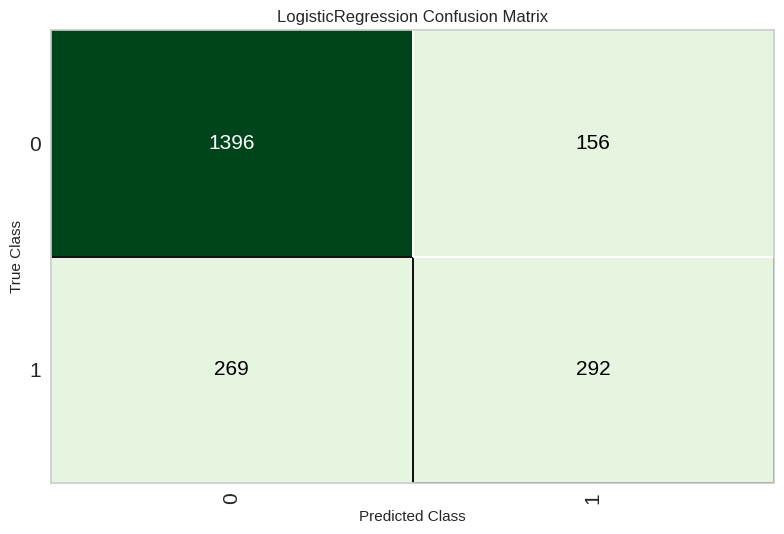

In [ ]:
# Analyse the Confusion Matrix of the tuned NB model
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
#check the dimensions of data
dataset.shape

(6000, 8)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [ ]:
from pycaret.regression import *
s = setup(data = data, target = 'Price', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


In [ ]:
best = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,707.5494,2263259.7973,1465.1384,0.9781,0.0751,0.0548,0.3370
et,Extra Trees Regressor,758.7793,2661557.6112,1584.1538,0.9743,0.0820,0.0608,2.0150
rf,Random Forest Regressor,760.1499,2944058.4839,1663.3278,0.9714,0.0815,0.0596,1.3910
lightgbm,Light Gradient Boosting Machine,752.6246,3056225.3710,1687.9572,0.9711,0.0773,0.0567,1.1020
gbr,Gradient Boosting Regressor,919.8439,3757700.7801,1899.5914,0.9634,0.1024,0.0770,0.4210
dt,Decision Tree Regressor,1011.9136,5382439.9624,2244.3755,0.9465,0.1082,0.0779,0.3070
ridge,Ridge Regression,2413.5698,14120482.9350,3726.1631,0.8621,0.6689,0.2875,0.1920
lasso,Lasso Regression,2412.1916,14246796.5754,3744.2300,0.8608,0.6767,0.2866,0.2030
llar,Lasso Least Angle Regression,2412.2092,14246792.3690,3744.2301,0.8608,0.6759,0.2866,0.3000
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.1690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
knn = create_model('knn',n_neighbors=3,fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2752.0212,23670642.0188,4865.2484,0.7401,0.3481,0.2476
1,3205.2910,43152215.0970,6569.0346,0.6693,0.3777,0.2612
2,2727.5767,29348034.7331,5417.3826,0.7308,0.3335,0.2362
3,2922.2804,30835135.3698,5552.9393,0.6598,0.3712,0.2413
4,2420.5917,22458660.5153,4739.0569,0.7199,0.3349,0.2399
5,2409.5379,22712275.3039,4765.7397,0.8062,0.3188,0.2229
6,2677.6279,28385342.6708,5327.7897,0.7333,0.3299,0.2140
7,2693.1852,24929178.6761,4992.9128,0.6847,0.3691,0.2433
8,2694.1076,28268155.3422,5316.7805,0.7224,0.3087,0.2067


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='uniform')


In [ ]:
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1965.5369,14905247.3479,3860.7315,0.8364,0.2530,0.1715
1,2309.4799,24807388.5245,4980.7016,0.8099,0.2638,0.1819
2,1960.2230,22964689.3539,4792.1487,0.7894,0.2574,0.1683
3,2099.1677,19435484.9910,4408.5695,0.7856,0.2727,0.1635
4,1812.7669,12359060.4464,3515.5455,0.8458,0.2470,0.1716
5,1856.0942,18556616.9408,4307.7392,0.8416,0.2344,0.1603
6,2099.1966,24490119.6672,4948.7493,0.7699,0.2417,0.1567
7,1954.6863,16484322.2723,4060.0889,0.7915,0.2761,0.1743
8,2091.0693,18775551.3575,4333.0764,0.8156,0.2438,0.1563


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance')


In [ ]:
import numpy as np
custom_knn_grid = {'n_neighbors': (1,3,5,7,9),'weights': ('uniform', 'distance')}

In [ ]:
custom_tuned_knn = tune_model(knn, custom_grid = custom_knn_grid, fold=10, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1965.5369,14905247.3479,3860.7315,0.8364,0.2530,0.1715
1,2309.4799,24807388.5245,4980.7016,0.8099,0.2638,0.1819
2,1960.2230,22964689.3539,4792.1487,0.7894,0.2574,0.1683
3,2099.1677,19435484.9910,4408.5695,0.7856,0.2727,0.1635
4,1812.7669,12359060.4464,3515.5455,0.8458,0.2470,0.1716
5,1856.0942,18556616.9408,4307.7392,0.8416,0.2344,0.1603
6,2099.1966,24490119.6672,4948.7493,0.7699,0.2417,0.1567
7,1954.6863,16484322.2723,4060.0889,0.7915,0.2761,0.1743
8,2091.0693,18775551.3575,4333.0764,0.8156,0.2438,0.1563


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(custom_tuned_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance')


In [ ]:
lr=create_model('lr',fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2380.5291,12271806.8201,3503.1139,0.8653,0.4740,0.2595
1,2600.1907,23326719.0525,4829.7742,0.8212,0.5635,0.2916
2,2437.7540,16113441.0767,4014.1551,0.8522,0.6429,0.2955
3,2459.8571,11571613.0317,3401.7074,0.8723,0.5756,0.2903
4,2460.3545,10178501.1164,3190.3763,0.8730,0.6427,0.3369
5,2454.7910,16825319.2513,4101.8678,0.8564,0.6067,0.2840
6,2279.4418,12727192.8280,3567.5191,0.8804,0.6794,0.2643
7,2410.0820,11701173.0714,3420.6977,0.8520,0.6816,0.2992
8,2381.4656,12642909.3915,3555.6869,0.8758,0.7420,0.2743


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2380.1095,12257488.6759,3501.0696,0.8654,0.4712,0.2593
1,2600.1907,23326719.0525,4829.7742,0.8212,0.5635,0.2916
2,2438.9672,16137061.9291,4017.0962,0.8520,0.6569,0.2963
3,2327.7226,10696169.9498,3270.5000,0.8820,0.7797,0.2744
4,2455.6426,10184575.6748,3191.3282,0.8730,0.6320,0.3353
5,2455.1986,16825054.5646,4101.8355,0.8564,0.6213,0.2840
6,2277.6679,12717889.1370,3566.2150,0.8805,0.6736,0.2640
7,2382.6416,11467436.2578,3386.3603,0.8550,0.6893,0.2931
8,2380.5104,12643776.9543,3555.8089,0.8758,0.7549,0.2742


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [ ]:
print(tuned_lr)

LinearRegression(fit_intercept=False, n_jobs=-1)


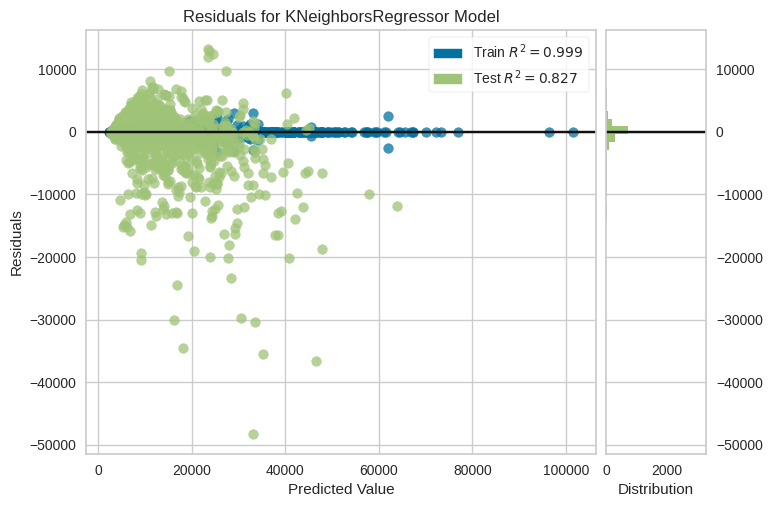

In [ ]:
plot_model(tuned_knn)

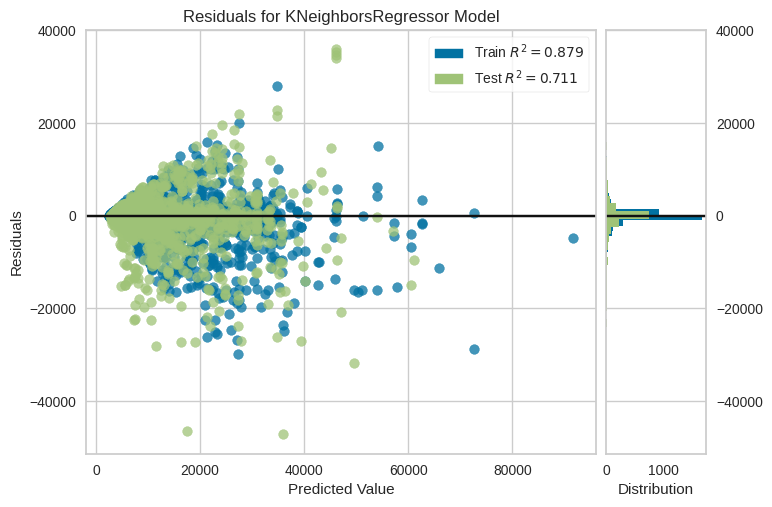

In [ ]:
plot_model(knn)

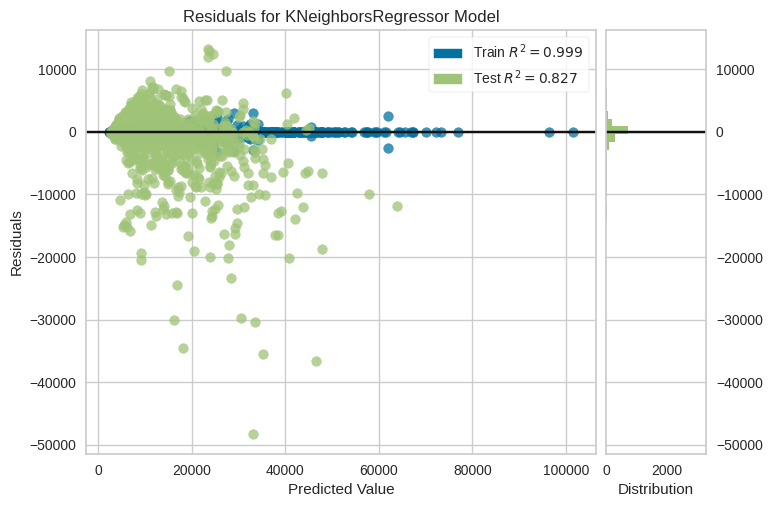

In [ ]:
plot_model(custom_tuned_knn)

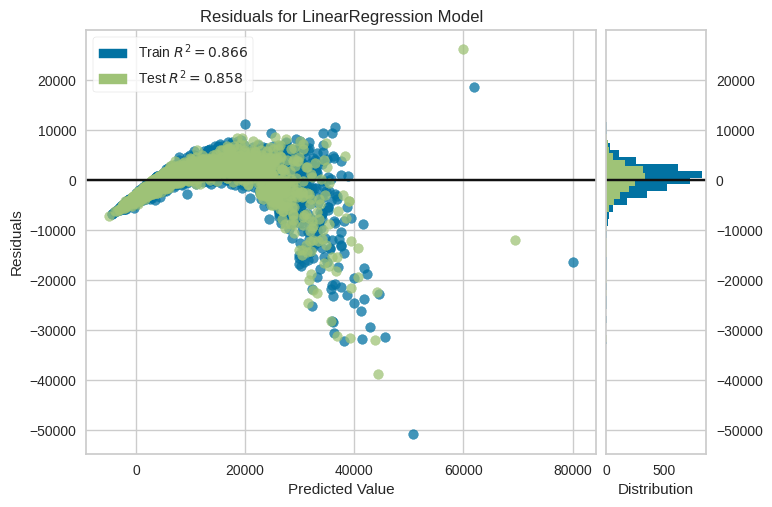

In [ ]:
plot_model(lr)

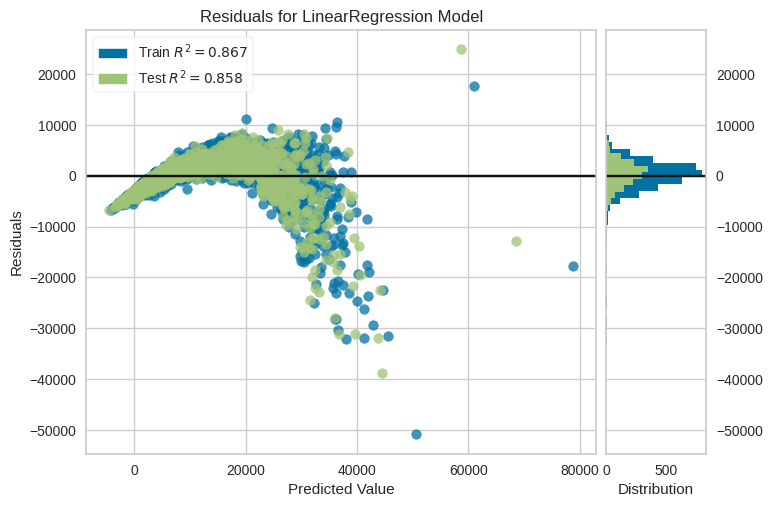

In [ ]:
plot_model(tuned_lr)

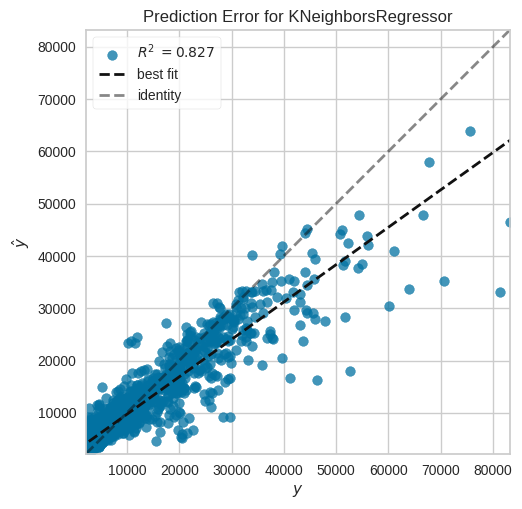

In [ ]:
plot_model(tuned_knn, plot = 'error')

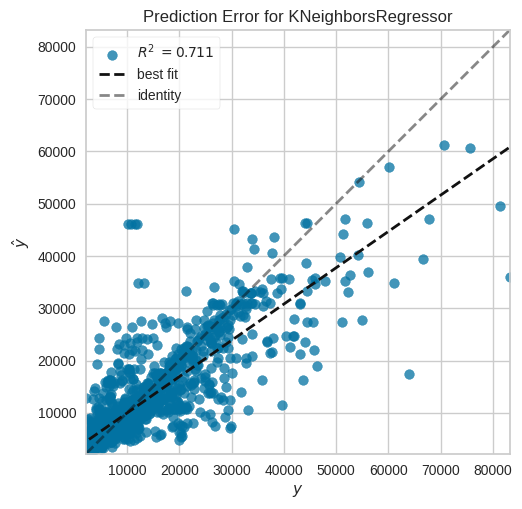

In [ ]:
plot_model(knn, plot = 'error')

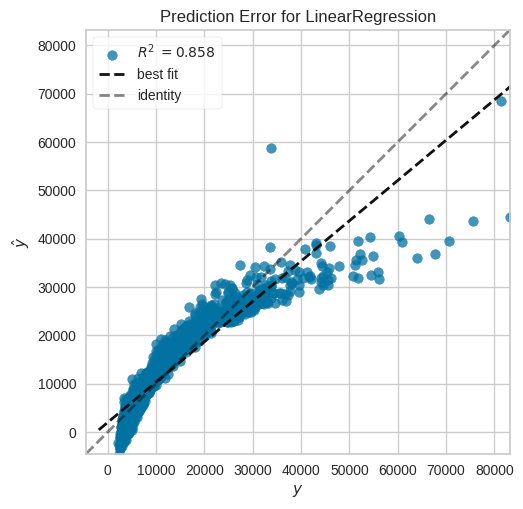

In [ ]:
plot_model(tuned_lr, plot = 'error')

In [ ]:
plot_model(tuned_knn, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(tuned_knn);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,2091.0959,19007691.8628,4359.7812,0.8266,0.2652,0.1742


In [ ]:
predict_model(knn);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,2862.4135,31730473.6261,5632.9809,0.7106,0.3557,0.2513


In [ ]:
predict_model(tuned_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2470.0104,15517562.5260,3939.2337,0.8585,0.5879,0.2734


In [ ]:
predict_model(lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2477.1258,15549705.8452,3943.3115,0.8582,0.5745,0.2746


In [ ]:
final_knn = finalize_model(tuned_knn)
print(final_knn)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Rep...
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                    

In [ ]:
predict_model(final_knn)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,85.6616,103016.9116,320.9625,0.9991,0.0222,0.0084


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
3172,1.16,Ideal,E,SI1,EX,EX,GIA,7059,7059.0
658,1.14,Ideal,G,SI1,EX,VG,GIA,5809,5809.0
3180,1.25,Very Good,G,IF,VG,VG,GIA,10641,10641.0
1340,0.79,Ideal,G,SI1,VG,EX,GIA,2871,2871.0
586,2.23,Very Good,H,VS2,VG,VG,GIA,21706,21706.0
...,...,...,...,...,...,...,...,...,...
790,1.22,Ideal,F,VVS1,EX,EX,GIA,12906,12906.0
4934,0.83,Ideal,E,SI1,G,EX,GIA,3235,3235.0
469,1.51,Very Good,I,VS2,VG,VG,GIA,9058,9118.0
2061,1.16,Ideal,I,SI1,EX,VG,GIA,5091,5091.0


In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,1967.3351,20409664.9460,4517.7057,0.8016,0.2632,0.1580


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11170.702116
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,5785.821497
2,1.01,Good,E,SI1,G,G,GIA,5161,5126.500000
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,29086.804513
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4078.000000


In [ ]:
save_model(final_knn,'Final knn Model 29052024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Carat Weight'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Cut', 'Color', 'Clarity',
                                              'Pol...
                                                               return_df=True,
                                                    

In [ ]:
saved_final_knn = load_model('Final knn Model 29052024')


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,1967.3351,20409664.9460,4517.7057,0.8016,0.2632,0.1580


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11170.702116
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,5785.821497
2,1.01,Good,E,SI1,G,G,GIA,5161,5126.500000
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,29086.804513
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4078.000000
